In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tqdm as tqdm


In [3]:
df = pd.read_csv('modified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  15000 non-null  int64  
 1   ticker                      15000 non-null  object 
 2   quarter                     15000 non-null  object 
 3   net_income                  15000 non-null  float64
 4   total_current_liabilities   15000 non-null  float64
 5   retained_earnings           15000 non-null  float64
 6   operating_income            15000 non-null  float64
 7   eps_diluted                 15000 non-null  float64
 8   shareholder_equity          15000 non-null  float64
 9   gross_profit                15000 non-null  float64
 10  cost_of_revenue             15000 non-null  float64
 11  eps_basic                   15000 non-null  float64
 12  goodwill                    15000 non-null  float64
 13  shares_outstanding_diluted  150

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'total_current_liabilities'}>,
        <Axes: title={'center': 'retained_earnings'}>],
       [<Axes: title={'center': 'operating_income'}>,
        <Axes: title={'center': 'eps_diluted'}>,
        <Axes: title={'center': 'shareholder_equity'}>,
        <Axes: title={'center': 'gross_profit'}>],
       [<Axes: title={'center': 'cost_of_revenue'}>,
        <Axes: title={'center': 'eps_basic'}>,
        <Axes: title={'center': 'goodwill'}>,
        <Axes: title={'center': 'shares_outstanding_diluted'}>],
       [<Axes: title={'center': 'total_assets'}>,
        <Axes: title={'center': 'cash_on_hand'}>,
        <Axes: title={'center': 'shares_outstanding_basic'}>,
        <Axes: title={'center': 'dismissal'}>]], dtype=object)

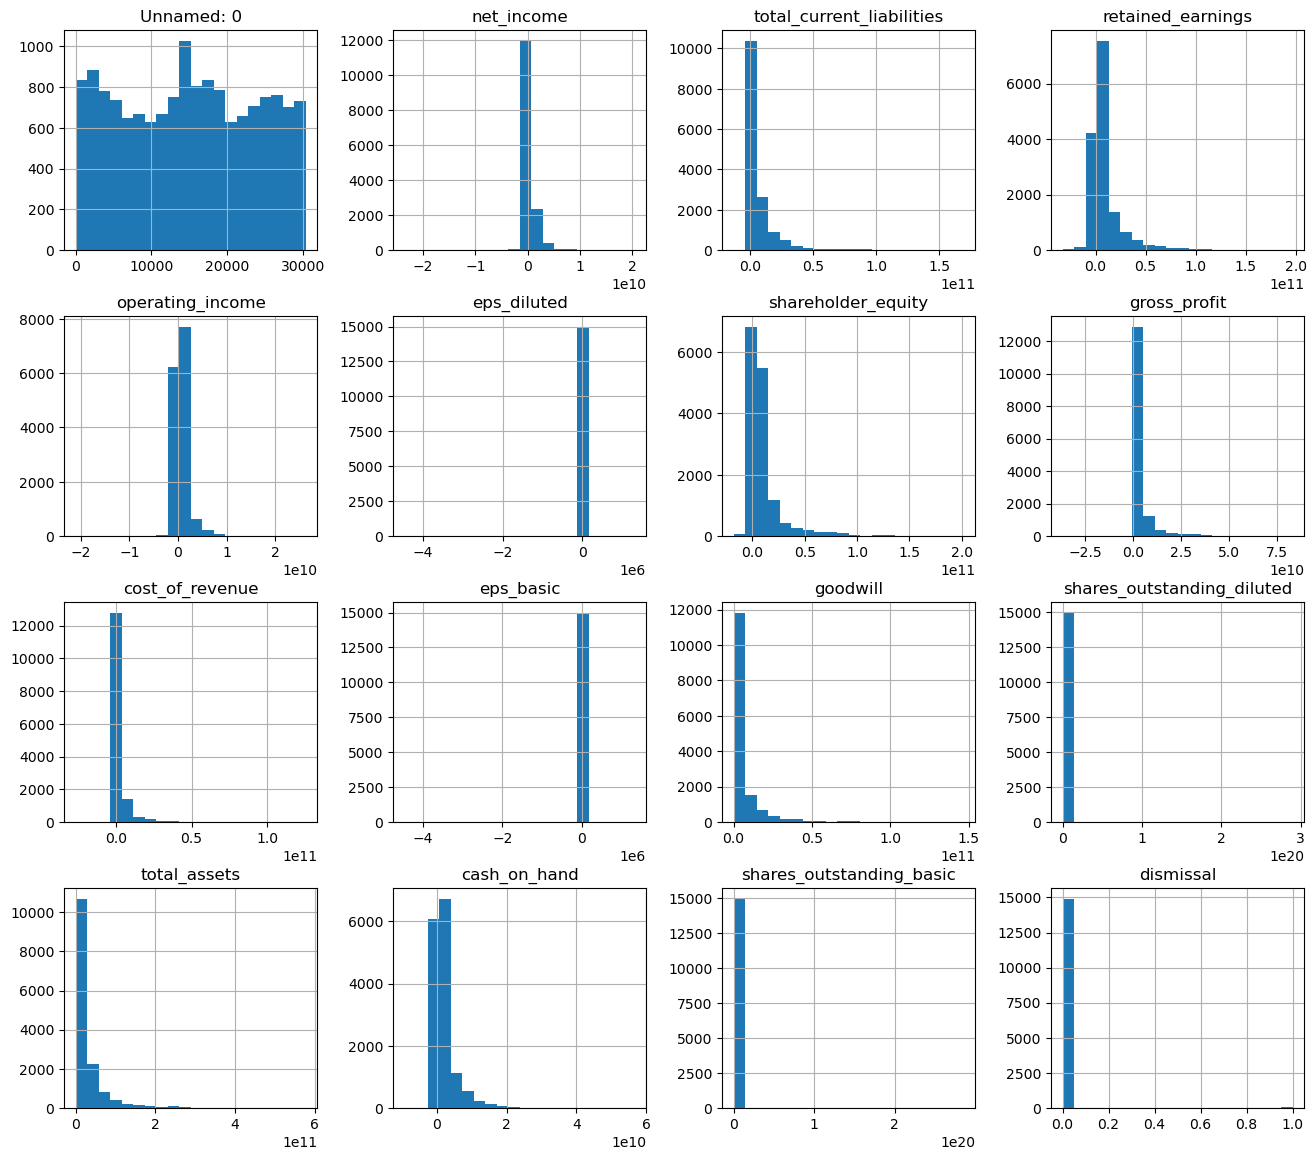

In [27]:
df.hist(figsize=(16, 14), bins=20)  

In [23]:
# Log transformations for select variables to reduce skewness
logdf = pd.DataFrame()
logdf['net_income'] = np.log(df['net_income']+1)
logdf['goodwill'] = np.log(df['goodwill']+1)
logdf['total_current_liabilities'] = np.log(df['total_current_liabilities']+1)
logdf['retained_earnings'] = np.log(df['retained_earnings']+1)
logdf['shareholder_equity'] = np.log(df['shareholder_equity']+1)
logdf['gross_profit'] = np.log(df['gross_profit']+1)
logdf['shares_outstanding_basic'] = np.log(df['shares_outstanding_basic']+1)
logdf['total_assets'] = np.log(df['total_assets']+1)
logdf['cash_on_hand'] = np.log(df['cash_on_hand']+1)
logdf['operating_income'] = np.log(df['goodwill']+1)
logdf['shares_outstanding_diluted'] = np.log(df['shares_outstanding_diluted']+1)
logdf['dismissal'] = df['dismissal']
logdf["eps_basic"] = df['eps_basic']
logdf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_income                  13667 non-null  float64
 1   goodwill                    15000 non-null  float64
 2   total_current_liabilities   14999 non-null  float64
 3   retained_earnings           13110 non-null  float64
 4   shareholder_equity          14374 non-null  float64
 5   gross_profit                14912 non-null  float64
 6   shares_outstanding_basic    15000 non-null  float64
 7   total_assets                15000 non-null  float64
 8   cash_on_hand                14996 non-null  float64
 9   operating_income            15000 non-null  float64
 10  shares_outstanding_diluted  15000 non-null  float64
 11  dismissal                   15000 non-null  int64  
 12  eps_basic                   15000 non-null  float64
dtypes: float64(12), int64(1)
memory

/Users/giorgikukishvili/Documents/Giorgi/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/giorgikukishvili/Documents/Giorgi/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/giorgikukishvili/Documents/Giorgi/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/giorgikukishvili/Documents/Giorgi/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/giorgikukishvili/Documents/Giorgi/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered 

array([[<Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'goodwill'}>,
        <Axes: title={'center': 'total_current_liabilities'}>,
        <Axes: title={'center': 'retained_earnings'}>],
       [<Axes: title={'center': 'shareholder_equity'}>,
        <Axes: title={'center': 'gross_profit'}>,
        <Axes: title={'center': 'shares_outstanding_basic'}>,
        <Axes: title={'center': 'total_assets'}>],
       [<Axes: title={'center': 'cash_on_hand'}>,
        <Axes: title={'center': 'operating_income'}>,
        <Axes: title={'center': 'shares_outstanding_diluted'}>,
        <Axes: title={'center': 'dismissal'}>],
       [<Axes: title={'center': 'eps_basic'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

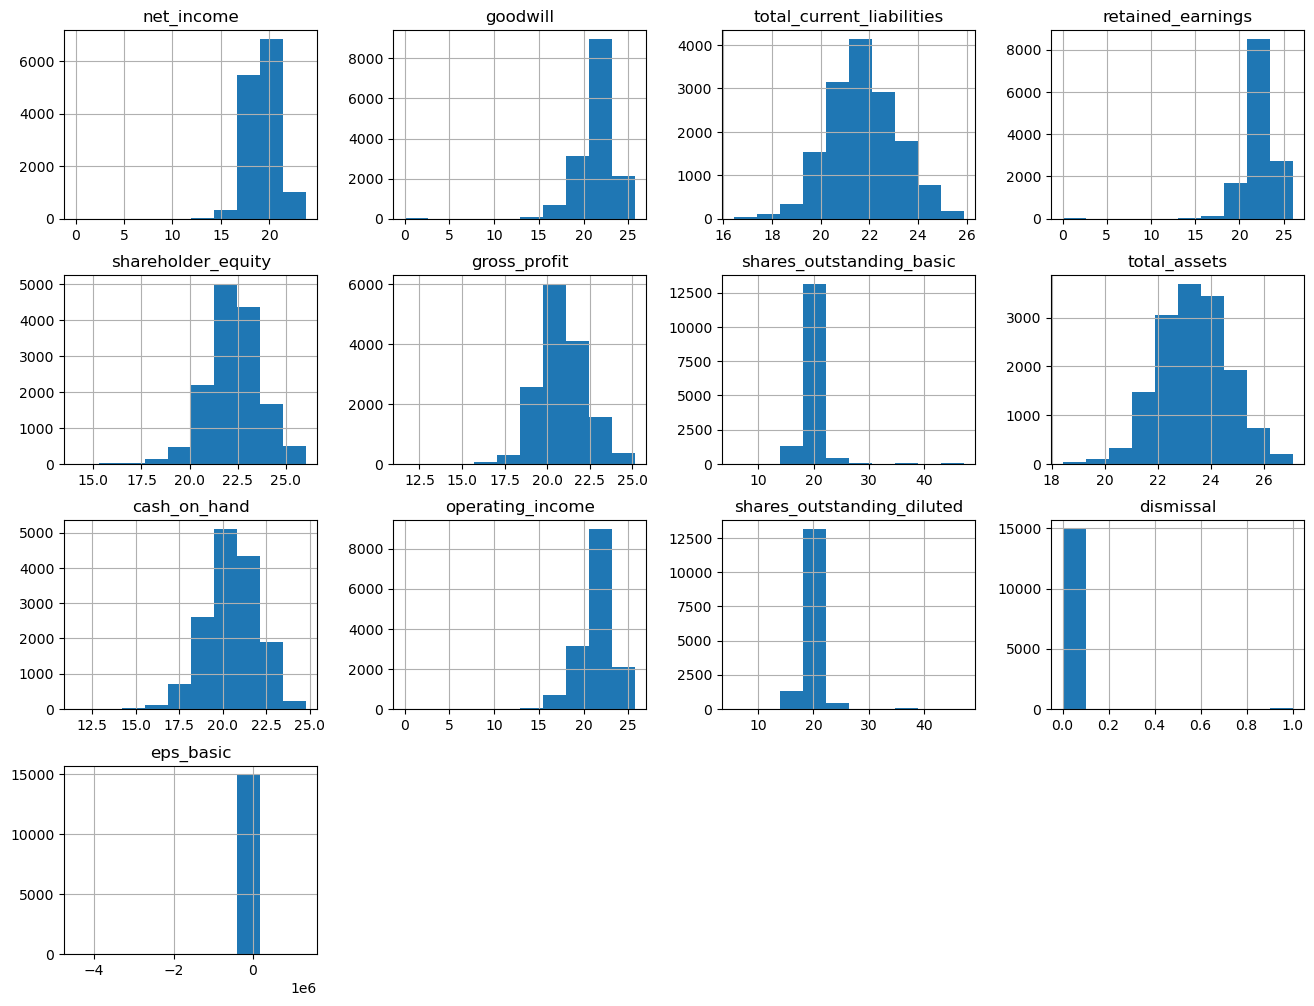

In [24]:
logdf.hist(figsize=(16,12))

/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_32351/3515688115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

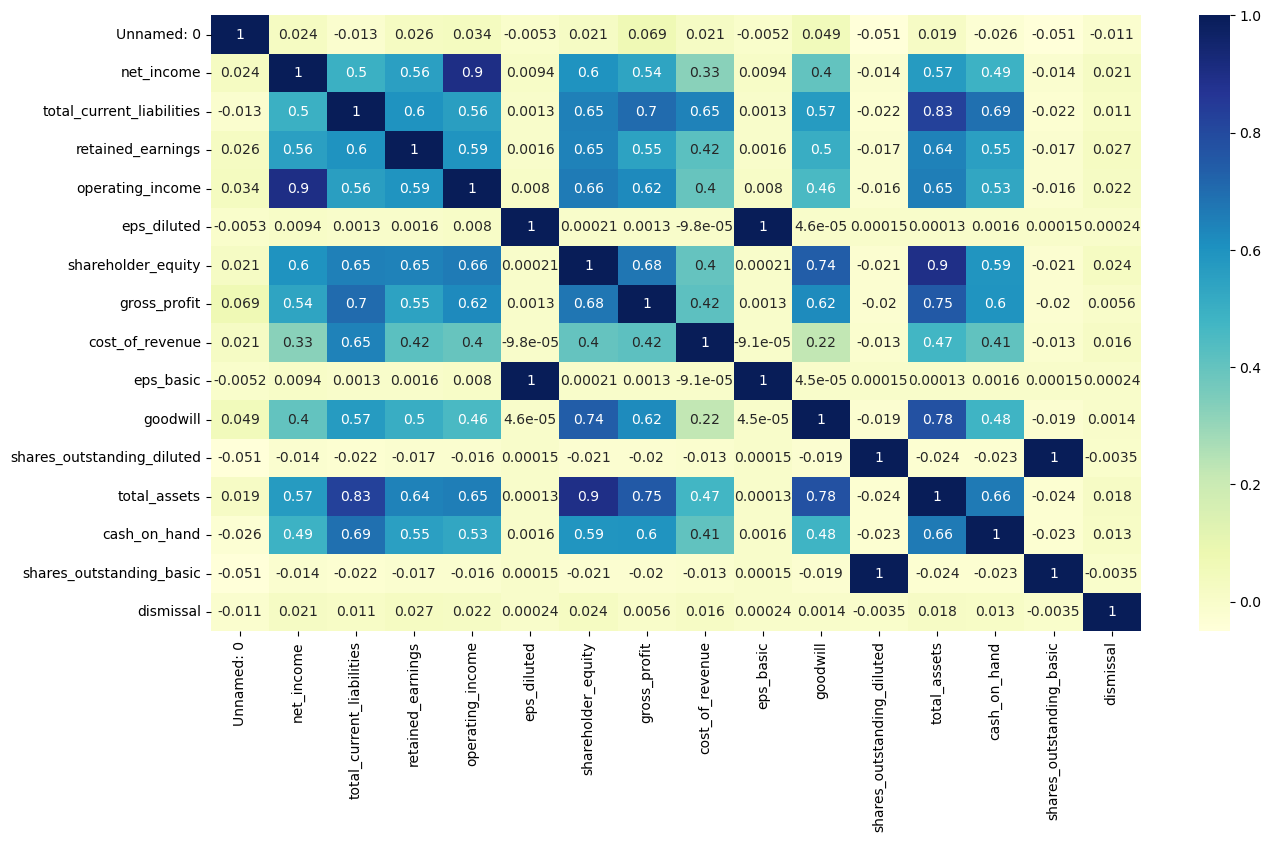

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<Axes: >

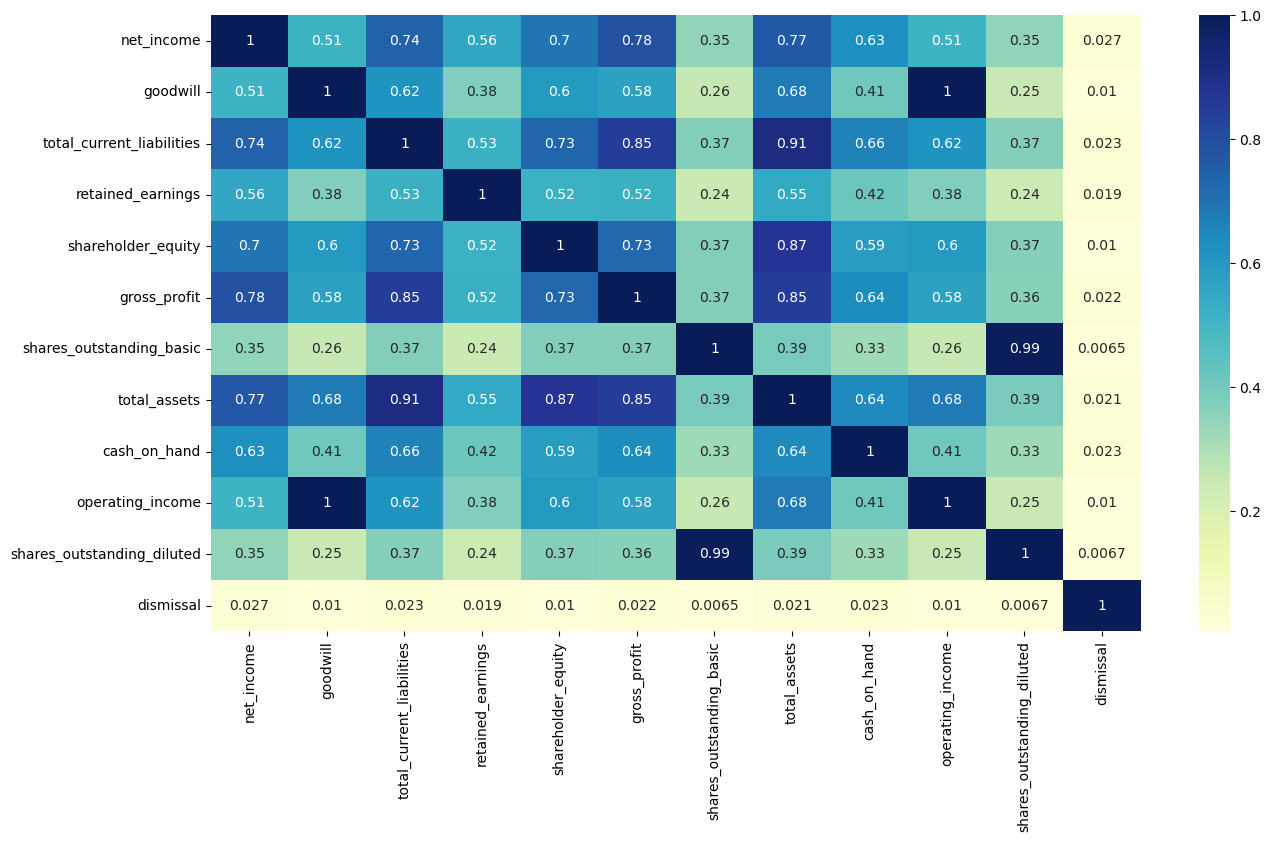

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(logdf.corr(), annot=True, cmap="YlGnBu")

In [25]:
logdf.to_csv('logdf.csv', index=False)
